# Loss Functions for Logistic Regression

In [62]:
# imports and setup
import numpy as np
from scipy.special import expit as logistic_sigmoid
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import sklearn.metrics
import sklearn.linear_model
import sklearn.tree
import sklearn.neighbors

%matplotlib inline
np.set_printoptions(suppress=True, precision=2)
pd.set_option('precision', 2) # number precision for pandas
plt.style.use('seaborn') # pretty matplotlib plots

sns.set(font_scale=2)

In [2]:
np.prod( 0.9 * np.ones(1000000))

2.5e-323

# Plot log loss and 0-1 loss

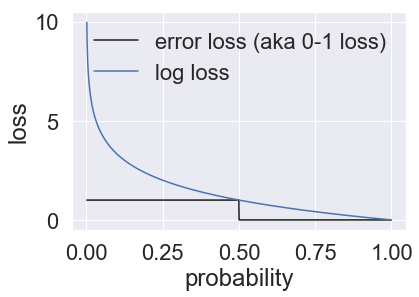

In [3]:
ytrue = 1

eps = 0.001
p_grid = np.linspace(eps, 1.0 - eps, 1000)
ytrue_grid = ytrue * np.ones_like(p_grid)

zeroone_loss_grid = p_grid < 0.5;
log_loss_grid = -1 * (ytrue_grid * np.log2(p_grid) + (1-ytrue_grid) * np.log2(1-p_grid));

plt.plot(p_grid, zeroone_loss_grid, 'k-', label='error loss (aka 0-1 loss)');
plt.plot(p_grid, log_loss_grid, 'b-', label='log loss');
plt.legend(loc='upper right');
plt.xlabel('probability');
plt.ylabel('loss');

# Create simple dataset in 1D

* Some $x$ values uniformly spaced between (-2, -1)
* Some $x$ values uniformly spaced between (+1, +2)
* Set $y$ so it's perfectly predicted if $x > 0$

In [4]:
def create_dataset(N=10, slope=4.2, noise_stddev=0.1, random_state=0):
    random_state = np.random.RandomState(int(random_state))
    x_N = np.hstack([np.linspace(-2, -1, N), np.linspace(1, 2, N)])
    
    y_N = x_N > 0
    
    return x_N, y_N

In [5]:
x_N, y_N = create_dataset(N=10)

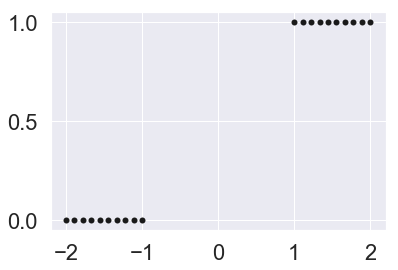

In [6]:
plt.plot(x_N, y_N, 'ko');

# What is the optimal w value here?

## Define loss function

In [7]:
def calc_loss(w):
    z_N = x_N * w
    proba1_N = logistic_sigmoid(z_N)
    log_loss = -1.0 * np.sum(y_N * np.log2(proba1_N) + (1 - y_N) * np.log2(1-proba1_N))
    return log_loss

In [8]:
w_grid = np.linspace(-5, 15, 100)

## Sanity check: plot loss evaluated at each w from -5 to 15

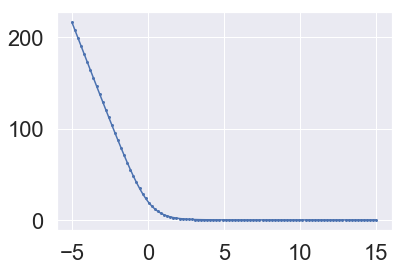

In [9]:
loss_grid = [calc_loss(w) for w in w_grid]
plt.plot(w_grid, loss_grid, 'b.-');

## Zoom in on last 20 points

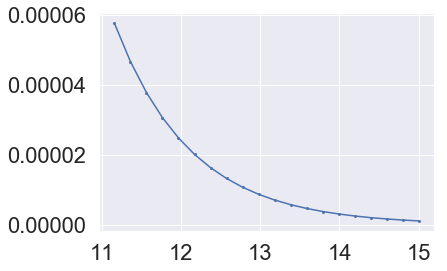

In [10]:
plt.plot(w_grid[-20:], loss_grid[-20:], 'b.-');

# Create simple dataset in 2D


In [11]:
def create_2d_dataset(N=10, slope=4.2, noise_stddev=0.1, random_state=0):
    random_state = np.random.RandomState(int(random_state))

    mA_2 = np.asarray([0, 0])
    covA_22 = 0.2 * np.eye(2)
    
    mB_2 = np.asarray([2, 2])
    covB_22 = 0.2 * np.eye(2)
    
    xA_N2 = random_state.multivariate_normal(mA_2, covA_22, size=N)
    xB_N2 = random_state.multivariate_normal(mB_2, covB_22, size=N)
    x_N2 = np.vstack([xA_N2, xB_N2])
    y_N = np.hstack([np.ones(xA_N2.shape[0]), np.zeros(xB_N2.shape[0])])
    
    return x_N2, y_N

In [12]:
x_N2, y_N = create_2d_dataset(N=100);

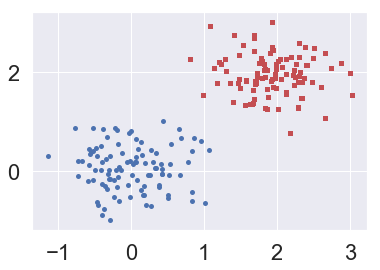

In [13]:
plt.plot(x_N2[y_N==0,0], x_N2[y_N==0,1], color='r', marker='s', linestyle='', markersize=5);
plt.plot(x_N2[y_N==1,0], x_N2[y_N==1,1], color='b', marker='.', linestyle='', markersize=10);

In [14]:
lr = sklearn.linear_model.LogisticRegression(C=10000.0)

In [15]:
lr.fit(x_N2, y_N)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [16]:
yproba1_N = lr.predict_proba(x_N2)[:,1]

In [17]:
yproba1_N[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
yproba1_N[-10:]

array([0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

# Create grid of x,y pairs

In [19]:
x1_grid_G = np.linspace(-2, 3, 100)
x2_grid_H = np.linspace(-2, 3, 100)



In [20]:
print(x1_GH.shape)
print(x1_GH.flatten().shape)

(100, 100)
(10000,)


In [21]:
x_M2 = np.hstack([x1_GH.flatten()[:,np.newaxis], x2_GH.flatten()[:,np.newaxis]])

In [22]:
x_M2.shape

(10000, 2)

## Predict at each value in the grid

In [23]:
yproba1_M = lr.predict_proba(x_M2)[:,1]
yproba1_GH = np.reshape(yproba1_M, x1_GH.shape)